# Time Series Analysis

In this notebook we will focus on studying the main time series components for each of the variables. The steps will be described below, but they will be repeated in each one of the variables. This analysis comes after the initial EDA done block by block, where we studied the different data fields and their distribution.

In [19]:
# Basic imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy import signal

path = "../data_postprocess/"
path_bruto = "../data/"

## Energy use 

We will study the following properties:
1. Trend using a Hodrick-Prescott Filter
    - We will try detrending with multiple tools
2. Seasonality with multiple box plots and autocorrelation plots
    - Seasonal decomposition
3. Cyclical Variations
4. Possible decompositions


In [14]:
# Importamos csv
energy_use = pd.read_csv(path+'ele_postprocess.csv')
#We change the date column into datetime format
energy_use['date']= pd.to_datetime(energy_use['date'])
energy_use.set_index('date', inplace=True)

The first variable we will study is 'mels_S' (miscellaneous energy use in the south wing of the building).

In [15]:
var = 'mels_S'

### Study of trend 



In [16]:
def plot_hpfilter(df, var, title):
    eu_cycle,eu_trend = hpfilter(df[var], lamb=1600) 
    eu_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
    plt.title(title)

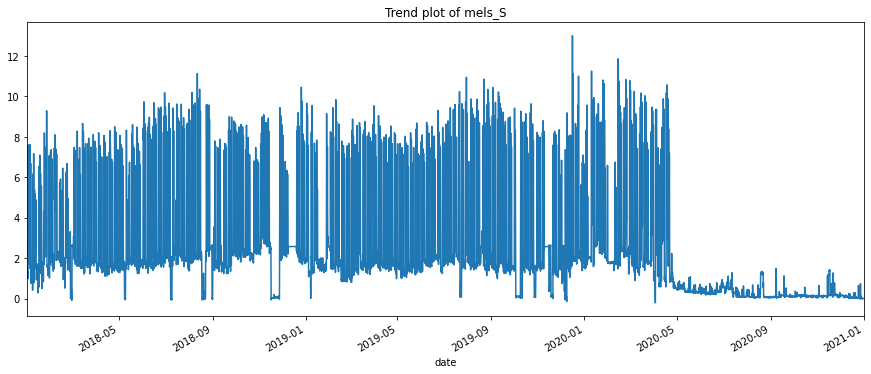

In [17]:
plot_hpfilter(energy_use, var, 'Trend plot of mels_S')

We don't really see a very clear trend, however, there is some seasonal pattern in the years 2018 and 2019. The last year (2020) is completely different, which makes sense since the use of the building decreased due to the pandemic.

#### Detrending

Even if we don't really have a clear trend, we want to check these tools and see if there are some subtrends that we didn't catch in our first analysis,.

In [36]:
def plot_detrends(df, var):

    fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(10,10) )
    diff = df[var].diff()

    axes[0].plot(diff)
    axes[0].set_title('Detrending using Differencing', fontsize=12) 
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('EXINUS exchange rate')


    detrended = signal.detrend(df[var].values)
    axes[1].plot(detrended)
    axes[1].set_title('Detrending using Scipy Signal', fontsize=12) 
    axes[1].set_xlabel('EXINUS')
    axes[1].set_ylabel('Frequency')

    eu_cycle,eu_trend = hpfilter(df[var], lamb=1600)
    detrended = df[var]-eu_trend
    axes[2].plot(detrended)
    axes[2].set_title('Detrending using HP Filter', fontsize=12) 
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('EXINUS exchange rate')
    plt.suptitle('Detrending: '+ var, fontsize=16)
    plt.tight_layout()

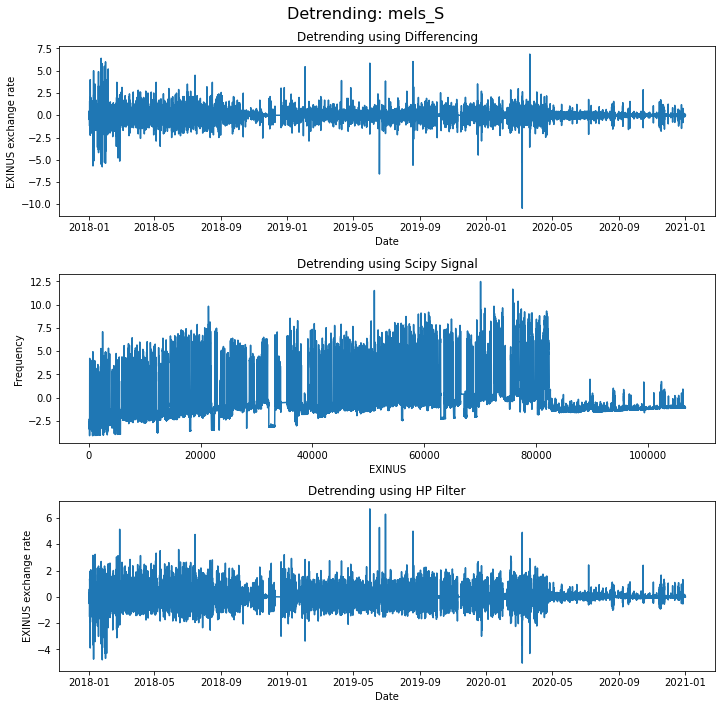

In [37]:
plot_detrends(energy_use, var)

## Seasonality 

We will study seasonality with Multiple Box Plots and Autocorrelation Plots:

### Multiple Box Plots

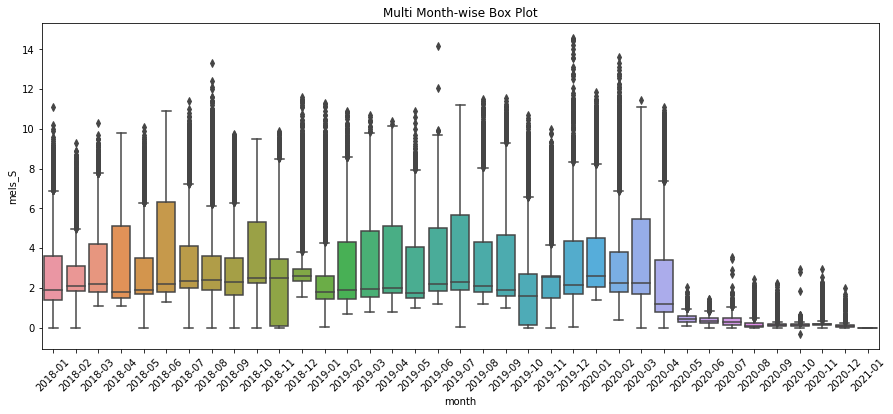

In [46]:
energy_use['month'] = energy_use.index.to_period("M")
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y=var, data=energy_use)
plt.title("Multi Month-wise Box Plot")
plt.xticks(rotation=45)
plt.show()

date
2018-01-01 01:00:00     1
2018-01-01 01:15:00     1
2018-01-01 01:30:00     1
2018-01-01 01:45:00     1
2018-01-01 02:00:00     1
                       ..
2020-12-31 23:00:00    12
2020-12-31 23:15:00    12
2020-12-31 23:30:00    12
2020-12-31 23:45:00    12
2021-01-01 00:00:00     1
Name: month, Length: 106738, dtype: int64